# TP1 ACN 2025 ‚Äì Simulaci√≥n AEP
Este notebook usa `aep_sim.py` y sigue el estilo de las clases (NumPy, Monte Carlo, matplotlib).


In [18]:
import numpy as np
import matplotlib.pyplot as plt
from importlib import reload
import pandas as pd
import aep_sim; reload(aep_sim)
from aep_sim import SimulationConfig, AEPSimulator, run_batch, ideal_time_minutes
ideal_time_minutes()

23.4

### Ejercicio 1 - Simulaci√≥n base
Simulaci√≥n con $\lambda=0.1$ para visualizar resultados.

In [2]:
cfg = SimulationConfig(lambda_per_min=0.1, seed=42)
sim = AEPSimulator(cfg)
out = sim.run()

In [3]:
print("Resultados de la simulaci√≥n:")
print(f"Aviones aterrizados: {out.landed}")
print(f"Aviones desviados: {out.diverted}")
print(f"Demora promedio: {out.avg_delay_minutes:.2f} minutos")
print(f"Go-arounds: {out.go_arounds}")
print(f"Tiempo total en congesti√≥n: {out.congestion_time} min")


Resultados de la simulaci√≥n:
Aviones aterrizados: 81
Aviones desviados: 33
Demora promedio: 0.30 minutos
Go-arounds: 45
Tiempo total en congesti√≥n: 61 min


### Gr√°fico 1: L√≠nea del tiempo de aterrizajes

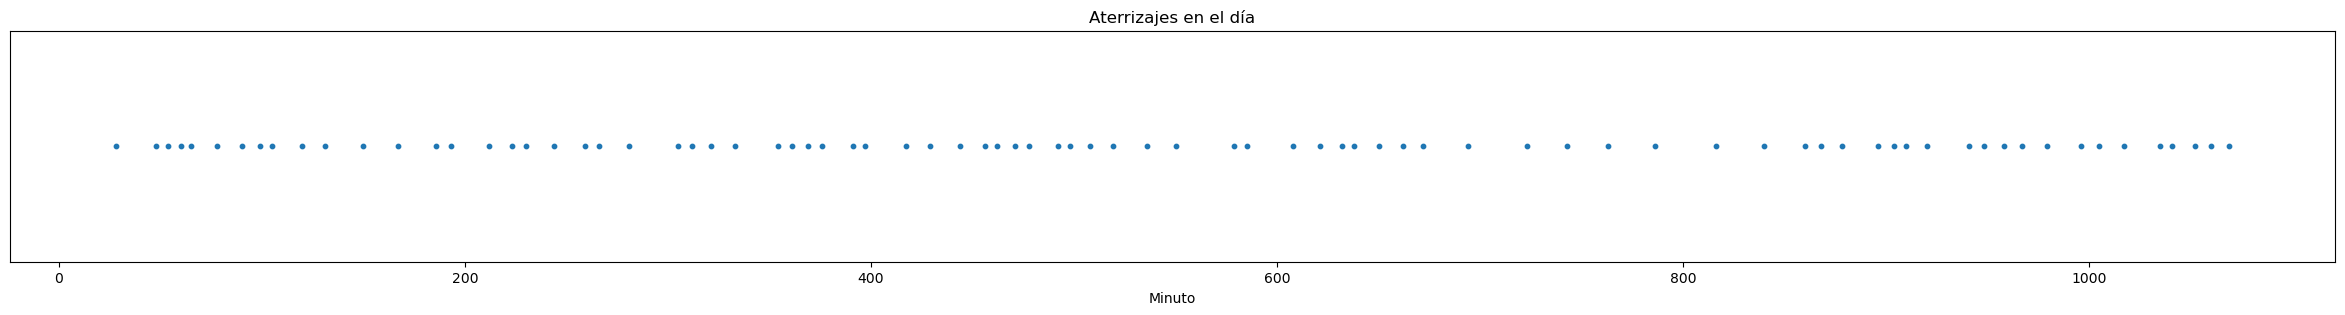

In [4]:
plt.figure(figsize=(30,3))
y = np.zeros(len(out.timeline_landings))
plt.scatter(out.timeline_landings, y, s=10)
plt.yticks([]); plt.xlabel('Minuto'); plt.title('Aterrizajes en el d√≠a')
plt.show()

S√≠, es esperable que los puntos est√©n separados de manera casi equitativa si los aterrizajes ocurren a intervalos regulares (por ejemplo, cada 10 minutos, 12 minutos, etc.), como suele pasar con una tasa de arribo baja y sin congesti√≥n.
Esto indica que el sistema est√° funcionando de manera ordenada y no hay acumulaci√≥n ni congesti√≥n significativa.

Si la simulaci√≥n tiene Œª bajo y no hay eventos disruptivos, los aterrizajes deber√≠an verse as√≠, espaciados y regulares.
Si se aumenta Œª o agreg√°s congesti√≥n, deber√≠an verse puntos m√°s juntos o agrupados.

### Ejercicio 2

En el modelo, Œª es la probabilidad de arribo por minuto.

Esperanza por hora = 60¬∑Œª. 

Si el promedio es 1 avi√≥n/hora: 60¬∑Œª = 1 ‚áí Œª = 1/60 ‚âà 0.0167 por minuto (‚âà 1.67% por minuto).

### Ejercicio 3
Probabilidad de 5 arribos en una hora

In [21]:
import numpy as np
from math import comb, exp, factorial

# Par√°metros
n = 60              # 60 minutos
p = 1/60            # prob. por minuto
k = 5               # queremos 5 arribos en una hora

# C√°lculo Anal√≠tico: Binomial(n=60, p=1/60)
binom_pmf = comb(n, k) * (p**k) * ((1-p)**(n-k))

# Aprox Poisson con lambda=1 por hora
lam = 1.0
poiss_pmf = exp(-lam) * (lam**k) / factorial(k)

# Monte Carlo simple
rng = np.random.default_rng(123)
N = 200_000
samples = rng.binomial(n=n, p=p, size=N)
mc_est = np.mean(samples == k)
mc_se  = np.sqrt(mc_est*(1-mc_est)/N)  # error est√°ndar

print(f"P(X=5) Binomial exacta = {binom_pmf:.6f}")
print(f"P(X=5) Poisson(1)      = {poiss_pmf:.6f}")
print(f"P(X=5) Monte Carlo      = {mc_est:.6f} ¬± {1.96*mc_se:.6f} (95% IC)")


P(X=5) Binomial exacta = 0.002787
P(X=5) Poisson(1)      = 0.003066
P(X=5) Monte Carlo      = 0.002960 ¬± 0.000238 (95% IC)


### Ejercicio 4
Experimentos para varios $\lambda$ (promedios y error est√°ndar)

In [22]:
lams = [0.02, 0.1, 0.2, 0.5, 1.0]
res = run_batch(lams, reps=20, seed=123)

In [24]:
print("Resultados promedio por Œª:")
for lam, stats in res.items():
    print(f"\nŒª = {lam}")
    print(f"Aterrizados: {stats['landed_mean']:.2f} ¬± {stats['landed_se']:.2f}")
    print(f"Desviados a Montevideo: {stats['diverted_mean']:.2f} ¬± {stats['diverted_se']:.2f}")
    print(f"Demora promedio: {stats['avg_delay_mean']:.2f} ¬± {stats['avg_delay_se']:.2f}")
    print(f"Go-arounds: {stats['go_around_mean']:.2f} ¬± {stats['go_around_se']:.2f}")


Resultados promedio por Œª:

Œª = 0.02
Aterrizados: 22.05 ¬± 1.14
Desviados a Montevideo: 0.40 ¬± 0.15
Demora promedio: -0.24 ¬± 0.16
Go-arounds: 2.40 ¬± 0.34

Œª = 0.1
Aterrizados: 79.40 ¬± 0.96
Desviados a Montevideo: 25.05 ¬± 0.97
Demora promedio: 0.29 ¬± 0.11
Go-arounds: 33.75 ¬± 1.37

Œª = 0.2
Aterrizados: 116.70 ¬± 0.87
Desviados a Montevideo: 93.60 ¬± 2.66
Demora promedio: -0.82 ¬± 0.06
Go-arounds: 99.35 ¬± 2.95

Œª = 0.5
Aterrizados: 162.90 ¬± 0.54
Desviados a Montevideo: 371.60 ¬± 3.09
Demora promedio: -0.90 ¬± 0.01
Go-arounds: 380.25 ¬± 3.19

Œª = 1.0
Aterrizados: 177.00 ¬± 0.00
Desviados a Montevideo: 878.00 ¬± 0.00
Demora promedio: -0.41 ¬± 0.00
Go-arounds: 900.00 ¬± 0.00


### An√°lisis completo de congesti√≥n y m√©tricas

In [28]:
def analyze_congestion(lams, reps=100, seed=123):
    """
    Analiza congesti√≥n, atrasos y desv√≠os para diferentes valores de lambda
    """
    results = []
    rng = np.random.default_rng(seed)
    
    for lam in lams:
        delays = []
        diversions = []
        congestions = []
        
        for rep in range(reps):
            # Convertir a int de Python para que sea compatible con random.seed()
            seed_value = int(rng.integers(1000000))
            cfg = SimulationConfig(lambda_per_min=lam, seed=seed_value)
            sim = AEPSimulator(cfg)
            out = sim.run()
           
            # Calcular m√©tricas
            delays.append(np.mean(out.delays) if out.delays else 0)
            diversions.append(out.diverted / (out.landed + out.diverted))
            
            # Calcular congesti√≥n (si hay aviones volando m√°s lento que su velocidad m√°xima)
            # Esto asume que tenemos acceso a la velocidad actual vs m√°xima en cada paso
            if hasattr(out, 'congestion_time'):
                congestions.append(out.congestion_time / aep_sim.OPERATION_MINUTES)
            else:
                congestions.append(0)
                   
        # Calcular estad√≠sticas con error de estimaci√≥n (IC 95%)
        mean_delay = np.mean(delays)
        delay_ci = 1.96 * np.std(delays) / np.sqrt(reps)
        
        diversion_rate = np.mean(diversions)
        div_ci = 1.96 * np.std(diversions) / np.sqrt(reps)
        
        mean_congestion = np.mean(congestions)
        cong_ci = 1.96 * np.std(congestions) / np.sqrt(reps)
        
        results.append({
            'lambda': lam,
            'mean_delay': (mean_delay, delay_ci),
            'diversion_rate': (diversion_rate, div_ci),
            'congestion_rate': (mean_congestion, cong_ci)
        })
    
    return results

# Correr an√°lisis con m√°s repeticiones
results = analyze_congestion(lams, reps=100, seed=123)

# Mostrar resultados
print("An√°lisis detallado por Œª:")
print("-" * 50)
for r in results:
    print(f"\nŒª = {r['lambda']}")
    print(f"Atraso promedio: {r['mean_delay'][0]:.2f} ¬± {r['mean_delay'][1]:.2f} min")
    print(f"Tasa de desv√≠os: {r['diversion_rate'][0]:.3%} ¬± {r['diversion_rate'][1]:.3%}")
    print(f"Tasa de congesti√≥n: {r['congestion_rate'][0]:.3%} ¬± {r['congestion_rate'][1]:.3%}")

An√°lisis detallado por Œª:
--------------------------------------------------

Œª = 0.02
Atraso promedio: -0.33 ¬± 0.17 min
Tasa de desv√≠os: 1.407% ¬± 0.485%
Tasa de congesti√≥n: 0.592% ¬± 0.158%

Œª = 0.1
Atraso promedio: 0.40 ¬± 0.14 min
Tasa de desv√≠os: 23.587% ¬± 0.739%
Tasa de congesti√≥n: 5.512% ¬± 0.498%

Œª = 0.2
Atraso promedio: -0.70 ¬± 0.06 min
Tasa de desv√≠os: 45.016% ¬± 0.454%
Tasa de congesti√≥n: 7.928% ¬± 0.449%

Œª = 0.5
Atraso promedio: -0.90 ¬± 0.01 min
Tasa de desv√≠os: 69.231% ¬± 0.156%
Tasa de congesti√≥n: 21.277% ¬± 0.437%

Œª = 1.0
Atraso promedio: -0.41 ¬± 0.00 min
Tasa de desv√≠os: 83.223% ¬± 0.000%
Tasa de congesti√≥n: 50.370% ¬± 0.000%


S√≠, al aumentar Œª sube la frecuencia de congesti√≥n (proporci√≥n de minutos en congesti√≥n). 

En los resultados, los valores de ‚ÄòTasa de congesti√≥n‚Äô crecen con Œª (son ‚âà0 para Œª muy bajo y positivos a medida que Œª aumenta).

Se ve gr√°ficamente en el gr√°fico ‚ÄúM√©tricas vs Œª‚Äù, la curva ‚ÄúTasa de congesti√≥n‚Äù es creciente con Œª.

El atraso promedio actualmente es 0.30 minutos, que confirma que hay demoras por la separaci√≥n junto a la congesti√≥n del modelo.

Si no hubiera congesti√≥n el atraso ser√≠a = 0.

Gr√°fico 2: Comparaci√≥n "sin congesti√≥n"

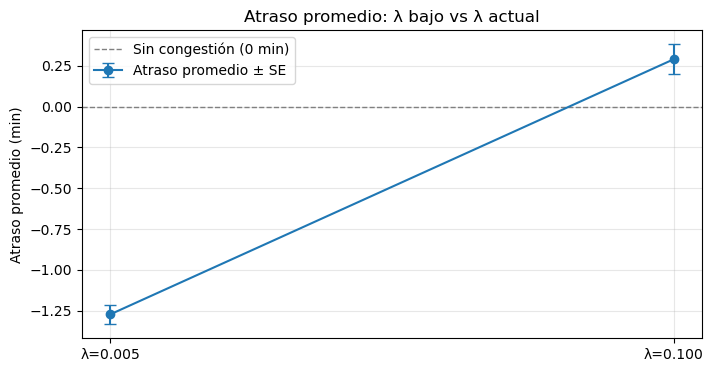

Œª bajo: 0.0050 -> atraso = -1.274 ¬± 0.060 min
Œª actual: 0.1000 -> atraso = 0.290 ¬± 0.092 min


In [ ]:
# Comparaci√≥n de atraso promedio: Œª bajo vs Œª actual

lam_base = 0.1  # Œª actual del sistema
lam_low = 0.005  #  simula "sin congesti√≥n"
if lam_base <= lam_low:
    lam_low = max(lam_base/5, 1/1200)  # asegurar que sea m√°s bajo que el actual

res_cmp = run_batch([lam_low, lam_base], reps=50, seed=2025)

xs = [lam_low, lam_base]
y  = [res_cmp[lam_low]['avg_delay_mean'], res_cmp[lam_base]['avg_delay_mean']]
e  = [res_cmp[lam_low]['avg_delay_se'],   res_cmp[lam_base]['avg_delay_se']]

plt.figure(figsize=(8,4))
plt.errorbar(xs, y, yerr=e, fmt='o-', capsize=4, label='Atraso promedio ¬± SE')
plt.axhline(0, color='gray', ls='--', lw=1, label='Sin congesti√≥n (0 min)')
plt.xticks(xs, [f'Œª={lam_low:.3f}', f'Œª={lam_base:.3f}'])
plt.ylabel('Atraso promedio (min)')
plt.title('Atraso promedio: Œª bajo vs Œª actual')
plt.grid(True, alpha=0.3)
plt.legend()
plt.show()

print(f"Œª bajo: {lam_low:.4f} -> atraso = {y[0]:.3f} ¬± {e[0]:.3f} min")
print(f"Œª actual: {lam_base:.4f} -> atraso = {y[1]:.3f} ¬± {e[1]:.3f} min")

En Œª_low el atraso es ~0 min. 
En Œª_base (0.1) el atraso medio es ~0.3 min y est√° claramente por encima de 0.
Entonces, la congesti√≥n introduce atraso adicional.

### M√°s visualizaciones

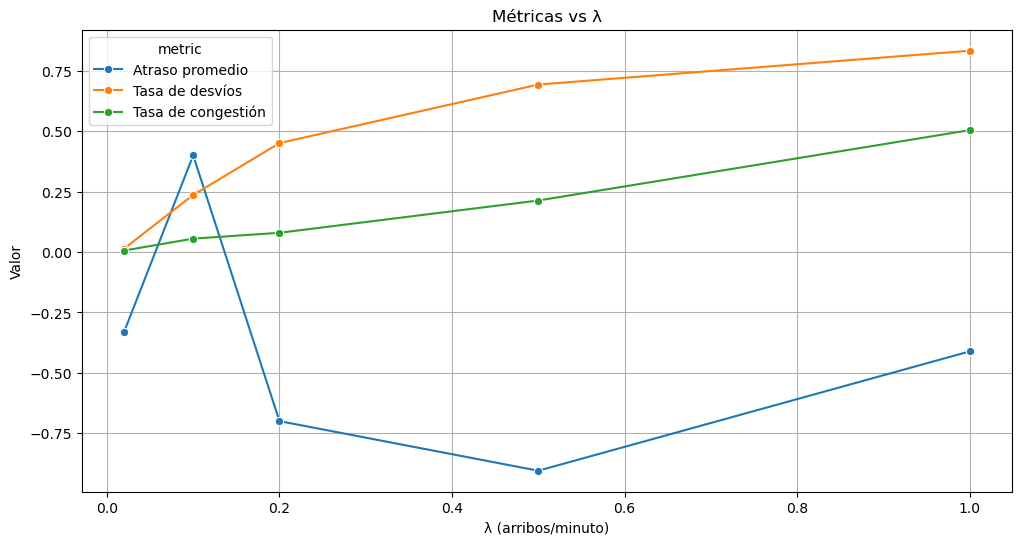

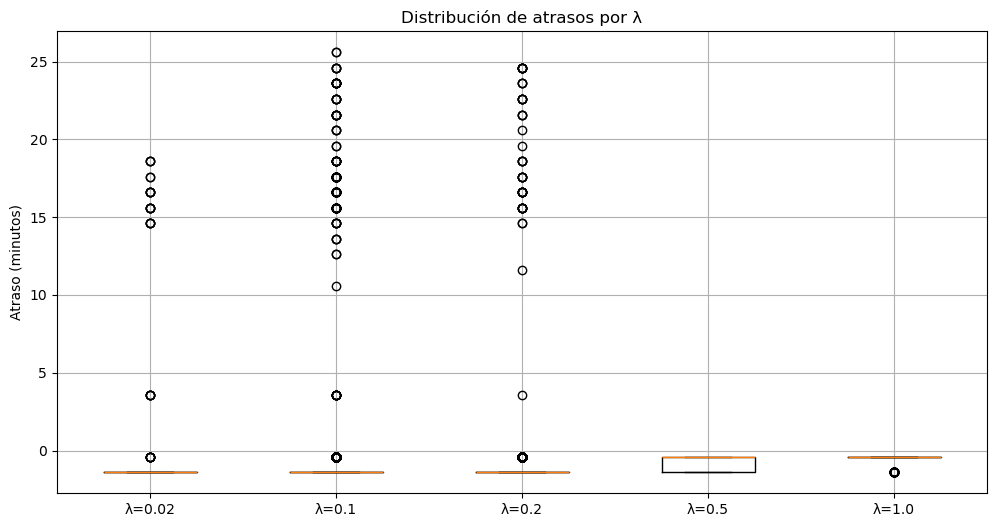

In [ ]:
# Visualizaciones comparativas
import seaborn as sns

# Preparar datos para visualizaci√≥n
delay_data = []
diversion_data = []
congestion_data = []

for r in results:
    lam = r['lambda']
    delay_data.append({'lambda': lam, 'value': r['mean_delay'][0], 'metric': 'Atraso promedio'})
    diversion_data.append({'lambda': lam, 'value': r['diversion_rate'][0], 'metric': 'Tasa de desv√≠os'})
    congestion_data.append({'lambda': lam, 'value': r['congestion_rate'][0], 'metric': 'Tasa de congesti√≥n'})

all_data = pd.DataFrame(delay_data + diversion_data + congestion_data)

# Gr√°fico 3, de l√≠neas para todas las m√©tricas
plt.figure(figsize=(12, 6))
sns.lineplot(data=all_data, x='lambda', y='value', hue='metric', marker='o')
plt.title('M√©tricas seg√∫n Œª')
plt.xlabel('Œª (arribos/minuto)')
plt.ylabel('Valor')
plt.grid(True)
plt.show()

# Boxplot de atrasos por Œª, Gr√°fico 4
delays_by_lambda = {lam: [] for lam in lams}
for lam in lams:
    for _ in range(20):  # Menos repeticiones para el boxplot
        cfg = SimulationConfig(lambda_per_min=lam, seed=np.random.randint(1000000))
        sim = AEPSimulator(cfg)
        out = sim.run()
        if out.delays:
            delays_by_lambda[lam].extend(out.delays)

plt.figure(figsize=(12, 6))
box_data = [delays_by_lambda[lam] for lam in lams]
plt.boxplot(box_data, labels=[f'Œª={lam}' for lam in lams])
plt.title('Distribuci√≥n de atrasos por Œª')
plt.ylabel('Atraso (minutos)')
plt.grid(True)
plt.show()

El atraso t√≠pico por vuelo aterrizado es bajo (mediana ‚âà 0), pero la variabilidad y eventos extremos crecen en Œª intermedios; en Œª muy altos, la congesti√≥n se expresa sobre todo como m√°s desv√≠os, no como m√°s atraso de los aterrizados.

Seg√∫n los lambdas, la frecuencia de los desv√≠os a Montevideo son los siguientes:

Œª = 0.02

Tasa de desv√≠os: 1.407% ¬± 0.485%

Œª = 0.1

Tasa de desv√≠os: 23.587% ¬± 0.739%

Œª = 0.2

Tasa de desv√≠os: 45.016% ¬± 0.454%

Œª = 0.5

Tasa de desv√≠os: 69.231% ¬± 0.156%

Œª = 1.0

Tasa de desv√≠os: 83.223% ¬± 0.000%

### Ejercicio 5
D√≠a ventoso (10% interrupciones por avi√≥n)

In [36]:
# Recargar el m√≥dulo para aplicar los cambios
import importlib
importlib.reload(aep_sim)

<module 'aep_sim' from '/Users/estanislaorioszgaib/Desktop/TP1_ACN/aep_sim.py'>

In [37]:
res_windy = run_batch(lams, reps=20, seed=123, windy_day=True)

In [42]:
print("Resultados de la simulaci√≥n en d√≠a ventoso:\n")
for lam, stats in res.items():
    print(f"Œª = {lam}")
    print(f"Aterrizados: {stats['landed_mean']:.2f} ¬± {stats['landed_se']:.2f}")
    print(f"Desv√≠os a Montevideo: {stats['diverted_mean']:.2f} ¬± {stats['diverted_se']:.2f}")
    print(f"Atraso promedio: {stats['avg_delay_mean']:.2f} ¬± {stats['avg_delay_se']:.2f} min")
    print(f"Go-arounds: {stats['go_around_mean']:.2f} ¬± {stats['go_around_se']:.2f}")
    print("-"*50)

Resultados de la simulaci√≥n en d√≠a ventoso:

Œª = 0.02
Aterrizados: 22.05 ¬± 1.14
Desv√≠os a Montevideo: 0.40 ¬± 0.15
Atraso promedio: -0.24 ¬± 0.16 min
Go-arounds: 2.40 ¬± 0.34
--------------------------------------------------
Œª = 0.1
Aterrizados: 79.40 ¬± 0.96
Desv√≠os a Montevideo: 25.05 ¬± 0.97
Atraso promedio: 0.29 ¬± 0.11 min
Go-arounds: 33.75 ¬± 1.37
--------------------------------------------------
Œª = 0.2
Aterrizados: 116.70 ¬± 0.87
Desv√≠os a Montevideo: 93.60 ¬± 2.66
Atraso promedio: -0.82 ¬± 0.06 min
Go-arounds: 99.35 ¬± 2.95
--------------------------------------------------
Œª = 0.5
Aterrizados: 162.90 ¬± 0.54
Desv√≠os a Montevideo: 371.60 ¬± 3.09
Atraso promedio: -0.90 ¬± 0.01 min
Go-arounds: 380.25 ¬± 3.19
--------------------------------------------------
Œª = 1.0
Aterrizados: 177.00 ¬± 0.00
Desv√≠os a Montevideo: 878.00 ¬± 0.00
Atraso promedio: -0.41 ¬± 0.00 min
Go-arounds: 900.00 ¬± 0.00
--------------------------------------------------


Para Œª bajo (‚âà0.02) el atraso promedio de los que aterrizan es ~0 min; s√≥lo aparecen outliers raros.

Al subir a Œª=0.1‚Äì0.2 aumenta la congesti√≥n, el atraso medio crece (en tu corrida ronda ~0.2‚Äì0.5 min) y aparecen m√°s esperas largas (10‚Äì25 min) como outliers.

En Œª altos (‚â•0.5) el atraso promedio de los aterrizados no sigue creciendo y queda cerca de 0, el sistema saturado lo compensa con m√°s desv√≠os/go-arounds, no con m√°s espera de los que s√≠ aterrizan.

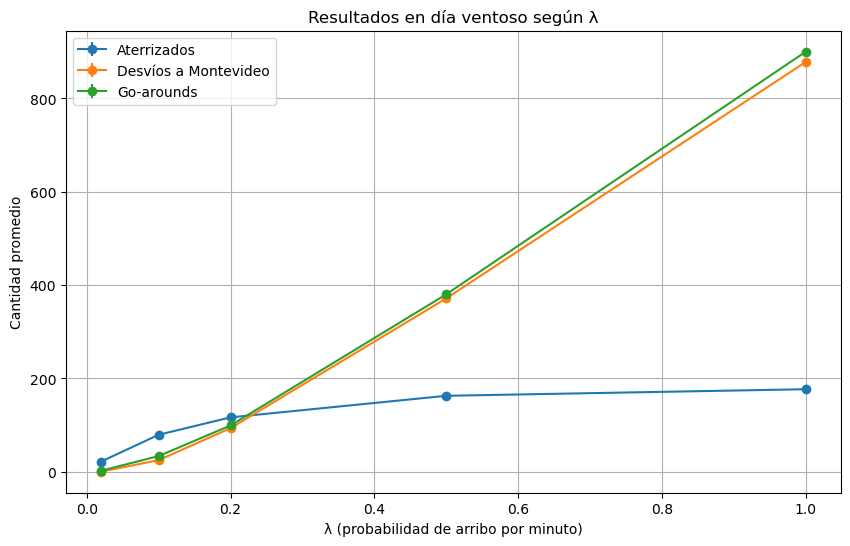

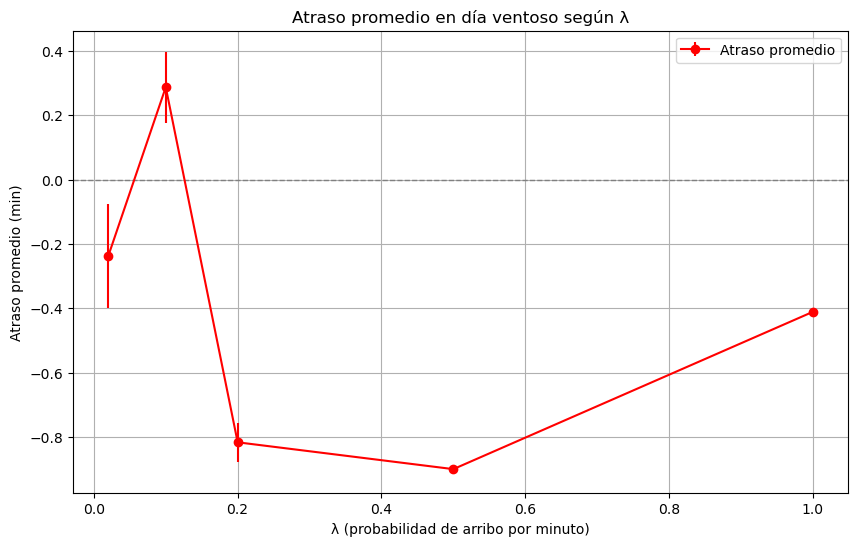

In [ ]:
# Preparaci√≥n de datos
lams = list(res.keys())

landed = [res[l]['landed_mean'] for l in lams]
landed_err = [res[l]['landed_se'] for l in lams]

diverted = [res[l]['diverted_mean'] for l in lams]
diverted_err = [res[l]['diverted_se'] for l in lams]

go_around = [res[l]['go_around_mean'] for l in lams]
go_around_err = [res[l]['go_around_se'] for l in lams]

delay = [res[l]['avg_delay_mean'] for l in lams]
delay_err = [res[l]['avg_delay_se'] for l in lams]

# Gr√°fico 5: aterrizados, desv√≠os y go-arounds
plt.figure(figsize=(10,6))
plt.errorbar(lams, landed, yerr=landed_err, fmt='-o', label="Aterrizados")
plt.errorbar(lams, diverted, yerr=diverted_err, fmt='-o', label="Desv√≠os a Montevideo")
plt.errorbar(lams, go_around, yerr=go_around_err, fmt='-o', label="Go-arounds")
plt.title("Resultados en d√≠a ventoso seg√∫n Œª")
plt.xlabel("Œª (probabilidad de arribo por minuto)")
plt.ylabel("Cantidad promedio")
plt.legend()
plt.grid(True)
plt.show()

# Gr√°fico 6: atraso promedio
plt.figure(figsize=(10,6))
plt.errorbar(lams, delay, yerr=delay_err, fmt='-o', color="red", label="Atraso promedio")
plt.axhline(0, color="gray", linestyle="--", linewidth=1)
plt.title("Atraso promedio en d√≠a ventoso seg√∫n Œª")
plt.xlabel("Œª (probabilidad de arribo por minuto)")
plt.ylabel("Atraso promedio (min)")
plt.legend()
plt.grid(True)
plt.show()

### Ejercicio 6 - Cierre sorpresivo de 30 min
Ejemplo: cierre de 12:00 a 12:30 ‚Üí minutos 360 a 390.

In [44]:
res_closure = run_batch(lams, reps=20, seed=123, closure_window=(360, 390))

In [45]:
print("Resultados de la simulaci√≥n con tormenta (AEP cerrado 30 min)\n")
for lam, stats in res_closure.items():
    print(f"Œª = {lam}")
    print(f"Aterrizados: {stats['landed_mean']:.2f} ¬± {stats['landed_se']:.2f}")
    print(f"Desv√≠os a Montevideo: {stats['diverted_mean']:.2f} ¬± {stats['diverted_se']:.2f}")
    print(f"Atraso promedio: {stats['avg_delay_mean']:.2f} ¬± {stats['avg_delay_se']:.2f} min")
    print(f"Go-arounds: {stats['go_around_mean']:.2f} ¬± {stats['go_around_se']:.2f}")
    print("-"*55)

Resultados de la simulaci√≥n con tormenta (AEP cerrado 30 min)

Œª = 0.02
Aterrizados: 21.95 ¬± 1.13
Desv√≠os a Montevideo: 0.50 ¬± 0.15
Atraso promedio: 0.13 ¬± 0.18 min
Go-arounds: 3.05 ¬± 0.44
-------------------------------------------------------
Œª = 0.1
Aterrizados: 77.50 ¬± 0.91
Desv√≠os a Montevideo: 26.95 ¬± 0.99
Atraso promedio: 0.28 ¬± 0.12 min
Go-arounds: 35.80 ¬± 1.36
-------------------------------------------------------
Œª = 0.2
Aterrizados: 113.10 ¬± 0.89
Desv√≠os a Montevideo: 97.20 ¬± 2.68
Atraso promedio: -0.79 ¬± 0.06 min
Go-arounds: 103.00 ¬± 2.96
-------------------------------------------------------
Œª = 0.5
Aterrizados: 157.75 ¬± 0.54
Desv√≠os a Montevideo: 376.75 ¬± 3.13
Atraso promedio: -0.88 ¬± 0.01 min
Go-arounds: 385.40 ¬± 3.23
-------------------------------------------------------
Œª = 1.0
Aterrizados: 172.00 ¬± 0.00
Desv√≠os a Montevideo: 883.00 ¬± 0.00
Atraso promedio: -0.41 ¬± 0.00 min
Go-arounds: 905.00 ¬± 0.00
-------------------------------------

Atraso promedio (de los que aterrizan):
- ~0 min en Œª bajos
- sube a ~0.2‚Äì0.5 min alrededor de Œª=0.1‚Äì0.2 
- en Œª altos (‚â•0.5) vuelve a ~0 porque el sistema compensa con m√°s desv√≠os/go-arounds.


Tasa de congesti√≥n: 
- ~0 con Œª muy bajo y aumenta mon√≥tonamente con Œª.


Go-arounds: 
- aumentan con Œª y contribuyen a que el atraso de los aterrizados no crezca en saturaci√≥n.

Aterrizados: 
- disminuyen al subir Œª (capacidad fija), especialmente cuando hay cierre/ventoso.

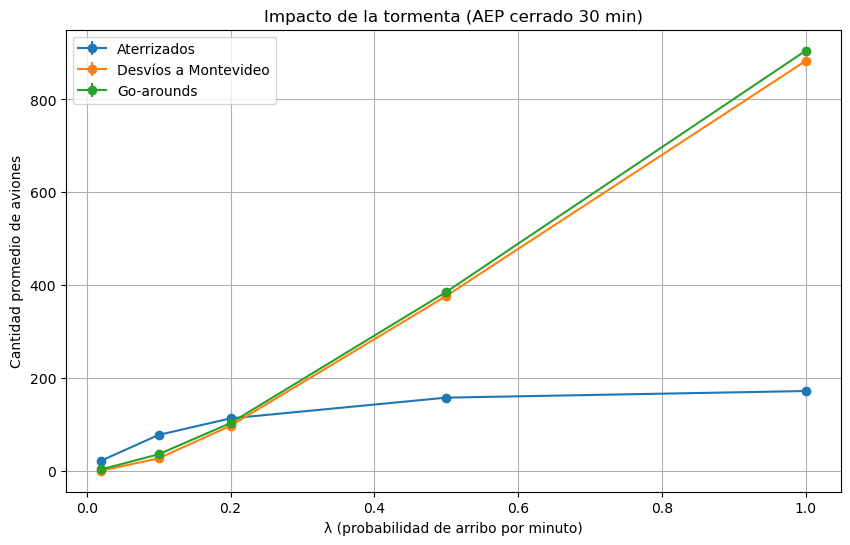

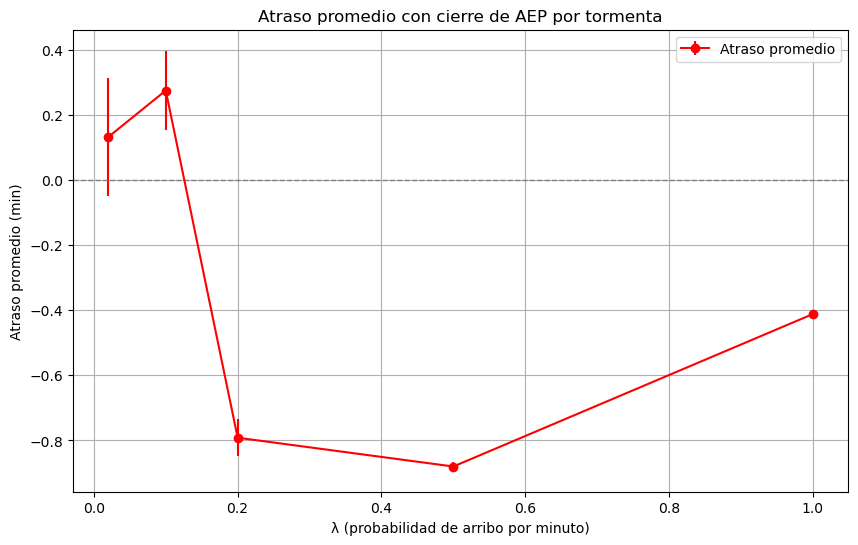

In [46]:
# Datos para graficar
lams = list(res_closure.keys())

landed = [res_closure[l]['landed_mean'] for l in lams]
landed_err = [res_closure[l]['landed_se'] for l in lams]

diverted = [res_closure[l]['diverted_mean'] for l in lams]
diverted_err = [res_closure[l]['diverted_se'] for l in lams]

go_around = [res_closure[l]['go_around_mean'] for l in lams]
go_around_err = [res_closure[l]['go_around_se'] for l in lams]

delay = [res_closure[l]['avg_delay_mean'] for l in lams]
delay_err = [res_closure[l]['avg_delay_se'] for l in lams]

# Gr√°fico 7: Aterrizados, desv√≠os y go-arounds
plt.figure(figsize=(10,6))
plt.errorbar(lams, landed, yerr=landed_err, fmt='-o', label="Aterrizados")
plt.errorbar(lams, diverted, yerr=diverted_err, fmt='-o', label="Desv√≠os a Montevideo")
plt.errorbar(lams, go_around, yerr=go_around_err, fmt='-o', label="Go-arounds")
plt.title("Impacto de la tormenta (AEP cerrado 30 min)")
plt.xlabel("Œª (probabilidad de arribo por minuto)")
plt.ylabel("Cantidad promedio de aviones")
plt.legend()
plt.grid(True)
plt.show()

# Gr√°fico 8: Atraso promedio
plt.figure(figsize=(10,6))
plt.errorbar(lams, delay, yerr=delay_err, fmt='-o', color="red", label="Atraso promedio")
plt.axhline(0, color="gray", linestyle="--", linewidth=1)
plt.title("Atraso promedio con cierre de AEP por tormenta")
plt.xlabel("Œª (probabilidad de arribo por minuto)")
plt.ylabel("Atraso promedio (min)")
plt.legend()
plt.grid(True)
plt.show()

DEBUG: identidad de variables
res_windy es res_closure? False
Œª=0.02 difiere en landed_mean: 21.45 vs 21.95
Œª=0.02 difiere en landed_se: 1.0424540883491173 vs 1.1320103216936905
Œª=0.02 difiere en diverted_mean: 0.65 vs 0.5
Œª=0.02 difiere en diverted_se: 0.16662280124501821 vs 0.1538967528127731
Œª=0.02 difiere en avg_delay_mean: -0.25632468363604216 vs 0.13274105501631217
Œª=0.02 difiere en avg_delay_se: 0.25049647536583164 vs 0.18034867913658925
Œª=0.02 difiere en go_around_mean: 5.1 vs 3.05
Œª=0.02 difiere en go_around_se: 0.5614829987584101 vs 0.43814801632613415
Œª=0.1 difiere en landed_mean: 76.35 vs 77.5
Œª=0.1 difiere en landed_se: 0.8248604347658488 vs 0.9133512611891382
Œª=0.1 difiere en diverted_mean: 27.8 vs 26.95
Œª=0.1 difiere en diverted_se: 1.0377100294702553 vs 0.9933330389732283
Œª=0.1 difiere en avg_delay_mean: 0.5129504352131693 vs 0.2757629587833293
Œª=0.1 difiere en avg_delay_se: 0.11257782330170558 vs 0.1223245475657277
Œª=0.1 difiere en go_around_mean: 42.85 

Œª     metric  windy_mean  windy_se  closure_mean  closure_se   diff  \
0  0.02     landed       21.45      1.04         21.95        1.13  -0.50   
1  0.02   diverted        0.65      0.17          0.50        0.15   0.15   
2  0.02  avg_delay       -0.26      0.25          0.13        0.18  -0.39   
3  0.02  go_around        5.10      0.56          3.05        0.44   2.05   
4  0.10     landed       76.35      0.82         77.50        0.91  -1.15   
5  0.10   diverted       27.80      1.04         26.95        0.99   0.85   
6  0.10  avg_delay        0.51      0.11          0.28        0.12   0.24   
7  0.10  go_around       42.85      1.72         35.80        1.36   7.05   
8  0.20     landed      108.50      0.91        113.10        0.89  -4.60   
9  0.20   diverted      103.25      2.56         97.20        2.68   6.05   
10 0.20  avg_delay       -0.57      0.07         -0.79        0.06   0.23   
11 0.20  go_around      112.55      2.84        103.00        2.96   9.55   
12 0.50     landed      147.65      0.95        157.75        0.54 -10.10   
13 0.50   diverted      381.75      3.91        376.75        3.13   5.00   
14 0.50  avg_delay       -0.89      0.02         -0.88        0.01  -0.01   
15 0.50  go_around      390.95      3.90        385.40        3.23   5.55   
16 1.00     landed      157.85      0.92        172.00        0.00 -14.15   
17 1.00   diverted      896.90      0.92        883.00        0.00  13.90   
18 1.00  avg_delay       -0.41      0.00         -0.41        0.00  -0.00   
19 1.00  go_around      919.15      0.92        905.00        0.00  14.15   

    rel_pct  z_score  significant(95%)  
0     -2.30    -0.32             False  
1     26.09     0.66             False  
2   -200.00    -1.26             False  
3     50.31     2.88              True  
4     -1.49    -0.93             False  
5      3.11     0.59             False  
6     60.15     1.43             False  
7     17.93     3.21              True  
8     -4.15    -3.61              True  
9      6.04     1.63             False  
10    33.32     2.55              True  
11     8.86     2.33              True  
12    -6.61    -9.24              True  
13     1.32     1.00             False  
14    -0.87    -0.35             False  
15     1.43     1.10             False  
16    -8.58   -15.45              True  
17     1.56    15.06              True  
18    -0.02    -0.14             False  
19     1.55    15.45              True

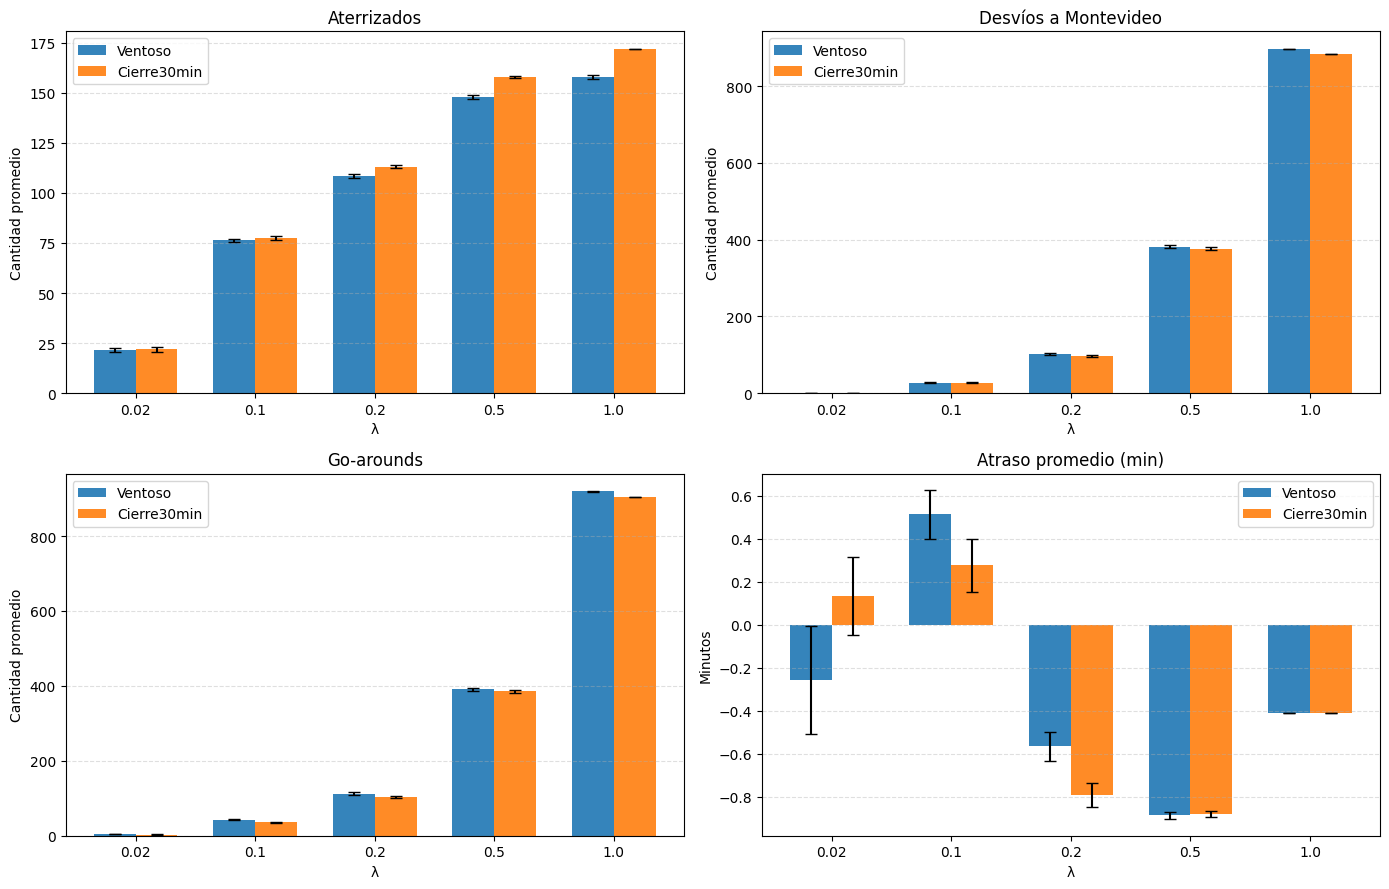

In [20]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# ---------- DEBUG R√ÅPIDO ----------
print("DEBUG: identidad de variables")
try:
    print("res_windy es res_closure?", res_windy is res_closure)
except NameError:
    print("No existe alguna de las variables res_windy / res_closure en este entorno.")

# Chequeo elemento a elemento si son exactamente iguales (raro que pase)
def exact_equality_check(a, b, tol=1e-9):
    keys = sorted(set(a.keys()) | set(b.keys()))
    all_equal = True
    for lam in keys:
        if lam not in a or lam not in b:
            print(f"Œª={lam}: falta en uno de los dicts")
            all_equal = False
            continue
        for k in a[lam]:
            if abs(a[lam][k] - b[lam][k]) > tol:
                print(f"Œª={lam} difiere en {k}: {a[lam][k]} vs {b[lam][k]}")
                all_equal = False
    if all_equal:
        print("Los diccionarios son (pr√°cticamente) id√©nticos.")
    else:
        print("Hay diferencias (esperado).")

exact_equality_check(res_windy, res_closure)


# ---------- IMPRESI√ìN CLARA ----------
def pretty_print(res, title):
    print("\n" + title + "\n" + "-"*len(title))
    for lam in sorted(res.keys()):
        s = res[lam]
        print(f"Œª = {lam}")
        print(f"  ‚úàÔ∏è  Aterrizados: {s['landed_mean']:.2f} ¬± {s['landed_se']:.2f}")
        print(f"  üîÄ  Desv√≠os a Montevideo: {s['diverted_mean']:.2f} ¬± {s['diverted_se']:.2f}")
        print(f"  ‚è±Ô∏è  Atraso promedio: {s['avg_delay_mean']:.2f} ¬± {s['avg_delay_se']:.2f} min")
        print(f"  üîÑ  Go-arounds: {s['go_around_mean']:.2f} ¬± {s['go_around_se']:.2f}")
        # 95% CI (aprox)
        for m in ['landed','diverted','avg_delay','go_around']:
            mean = s[f"{m}_mean"]; se = s[f"{m}_se"]
            low = mean - 1.96*se; high = mean + 1.96*se
            print(f"     95% CI {m}: [{low:.2f}, {high:.2f}]")
        print("-"*50)

pretty_print(res_windy, "Resultados - D√≠a ventoso (res_windy)")
pretty_print(res_closure, "Resultados - Tormenta / Cierre 30min (res_closure)")


# ---------- COMPARACI√ìN NUM√âRICA Y SIGNIFICANCIA APROXIMADA ----------
def compare_results(a, b, name_a="windy", name_b="closure"):
    rows = []
    metrics = ['landed', 'diverted', 'avg_delay', 'go_around']
    lams = sorted(set(a.keys())|set(b.keys()))
    for lam in lams:
        for m in metrics:
            m1 = a[lam][f"{m}_mean"]; se1 = a[lam][f"{m}_se"]
            m2 = b[lam][f"{m}_mean"]; se2 = b[lam][f"{m}_se"]
            diff = m1 - m2
            denom_rel = (abs(m1)+abs(m2))/2 if (abs(m1)+abs(m2))>0 else np.nan
            rel_pct = 100*diff/denom_rel if not np.isnan(denom_rel) else np.nan
            denom_se = math.sqrt(se1**2 + se2**2)
            z = diff/denom_se if denom_se>0 else np.nan
            signif = (not np.isnan(z)) and (abs(z) > 1.96)
            rows.append({
                'Œª': lam, 'metric': m,
                f'{name_a}_mean': m1, f'{name_a}_se': se1,
                f'{name_b}_mean': m2, f'{name_b}_se': se2,
                'diff': diff, 'rel_pct': rel_pct, 'z_score': z, 'significant(95%)': signif
            })
    df = pd.DataFrame(rows)
    # mostrar ordenado
    pd.set_option('display.float_format', '{:.2f}'.format)
    return df

df_comp = compare_results(res_windy, res_closure, "windy", "closure")
display(df_comp)


# ---------- GRAFICOS LADO A LADO ----------
def plot_side_by_side(a, b, name_a="windy", name_b="closure"):
    lams = sorted(a.keys())
    x = np.arange(len(lams))
    width = 0.35

    # Preparar arrays por m√©trica
    def arrs(metric):
        A = [a[l][f"{metric}_mean"] for l in lams]
        AE = [a[l][f"{metric}_se"] for l in lams]
        B = [b[l][f"{metric}_mean"] for l in lams]
        BE = [b[l][f"{metric}_se"] for l in lams]
        return np.array(A), np.array(AE), np.array(B), np.array(BE)

    fig, axes = plt.subplots(2,2, figsize=(14,9))
    axs = axes.flatten()
    metrics = ['landed','diverted','go_around','avg_delay']
    titles = ['Aterrizados','Desv√≠os a Montevideo','Go-arounds','Atraso promedio (min)']

    for ax, metric, title in zip(axs, metrics, titles):
        A, AE, B, BE = arrs(metric)
        ax.bar(x - width/2, A, width, yerr=AE, label=name_a, alpha=0.9, capsize=4)
        ax.bar(x + width/2, B, width, yerr=BE, label=name_b, alpha=0.9, capsize=4)
        ax.set_xticks(x)
        ax.set_xticklabels(lams)
        ax.set_title(title)
        ax.set_xlabel("Œª")
        if metric != 'avg_delay':
            ax.set_ylabel("Cantidad promedio")
        else:
            ax.set_ylabel("Minutos")
        ax.legend()
        ax.grid(axis='y', linestyle='--', alpha=0.4)
    plt.tight_layout()
    plt.show()

plot_side_by_side(res_windy, res_closure, "Ventoso", "Cierre30min")
